In [1]:
import time
import cv2

import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Rpi
#echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
#curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
#sudo apt-get update
#sudo apt-get install python3-tflite-runtime

import tflite_runtime.interpreter as tflite

#pip install pycoral
import pycoral.utils.edgetpu as edgetpu
from pycoral.adapters import common
from pycoral.adapters import classify
from pycoral.utils.dataset import read_label_file

In [21]:
camera_object = cv2.VideoCapture(0)

In [22]:
return_status, picture = camera_object.read()

In [23]:
#print(picture)

In [24]:
def take_picture(camera_object, input_image_size=(224,224)):
    
    return_status, picture = camera_object.read()
    
    picture_rgb = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    picture_rgb = cv2.resize(picture_rgb, input_image_size)
    
       
    return picture_rgb


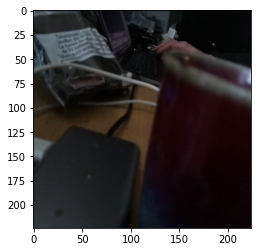

In [25]:
picture_rgb = take_picture(camera_object)
picture_as_image_object = Image.fromarray(picture_rgb)
plt.imshow(picture_as_image_object)

In [ ]:
picture_rgb.shape

In [8]:
camera_object.release()

In [14]:
def initialize_model(model_path='model_unquant.tflite', coral_accelerator = 0):
    
    if (coral_accelerator==1):
        interpreter = edgetpu.make_interpreter(model_path_or_content=model_path)
    else:
        interpreter = tflite.Interpreter(model_path=model_path)

    interpreter.allocate_tensors()
    #size = common.input_size(interpreter)
    
    return interpreter

In [15]:
interpreter = initialize_model()

In [45]:
def model_prediction(interpreter, picture_array):
    
    common.set_input(interpreter, picture_array)
    interpreter.invoke()
    prediction, probability = classify.get_classes(interpreter, top_k=1)[0]
        
    return prediction, probability


In [46]:
start_time = time.time()
prediction, probability = model_prediction(interpreter, picture_rgb)
# Maybe picture_rgb as picture_as_image_object
print(time.time()-start_time)

0.0961616039276123


In [47]:
prediction, probability

(1, 0.99857616)

## Prédiction en continu  

In [1]:
import cv2
import myfunctions

In [2]:
# Intialisation de la caméra
camera_object = cv2.VideoCapture(0)

# Intialisation du modèle
interpreter = myfunctions.initialize_model(model_path='model_unquant.tflite')

In [3]:
# Répéter indéfiniment
while True:
    
    # Prendre une image de la caméra
    picture_rgb = myfunctions.take_picture(camera_object)
    
    # Prédire la classe de l'image
    prediction, probability = myfunctions.model_prediction(interpreter, picture_rgb)
    
    # Si la prédiction est la classe 0, alors la prédiction est sol
    if prediction == 0:
        
        print("Je vois le sol")
        
    # Si la prédiction est la classe 1, alors la prédiction est tube
    if prediction == 1:
        
        print("J'ai trouvé un tube!")
    

J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!
J'ai trouvé un tube!


KeyboardInterrupt: 

In [ ]:
# Répéter indéfiniment
while True:
    
    # Prendre une image de la caméra
    picture_rgb = myfunctions.take_picture(camera_object)
    
    # Prédire la classe de l'image
    prediction, probability = myfunctions.model_prediction(interpreter, picture_rgb)
    
    # Si la prédiction est la classe 0, alors la prédiction est sol
    if prediction == 0:
        
        print("Je vois le sol avec un probabilité de :"+str(probability))
        
    # Si la prédiction est la classe 1, alors la prédiction est tube
    if prediction == 1:
        
        print("J'ai trouvé un tube! La probabilité est de :"+str(probability))